In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('spam.csv', encoding='latin-1')

In [3]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
3857,ham,R u still working now?,NaN,NaN,NaN
4206,ham,"Lets use it next week, princess :)",NaN,NaN,NaN
2829,ham,Howz that persons story,NaN,NaN,NaN
4127,ham,I dont thnk its a wrong calling between us,NaN,NaN,NaN
2030,ham,"Ugh y can't u just apologize, admit u were wro...",NaN,NaN,NaN


In [4]:
df.shape

(5572, 5)

In [5]:
# Stages of project
# 1. Data cleaning (eg-> removing Nan values)
# 2. EDA (Expolatory data analysis)
# 3. Text pre-processing (using vectorisation and all)
# 4. Model building
# 5. Evalution
# 6. Improvement based on Evalution
# 7. Make website for same
# 8. Deploy it.

## 1. Data Cleaning

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 108.9+ KB


In [7]:
# drop last 3 columns
df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace=True)

In [8]:
df.head(10)

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...
6,ham,Even my brother is not like to speak with me. ...
7,ham,As per your request 'Melle Melle (Oru Minnamin...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...


In [9]:
# let us rename the columns
df.rename(columns={'v1': 'target', 'v2': 'text'}, inplace=True)
df.head(5)

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [10]:
# change the ham and spam values to 0 and 1 for easy calculation, coz model works well on numeric data
from sklearn.preprocessing import LabelEncoder
# make object of it 
encoder = LabelEncoder()
# fit_transform() will automatically assign numeric values(starting from zero) to target varible
df['target'] = encoder.fit_transform(df['target'])
# so now if sms is spam -> 1 (Spam)
# else we have -> 0 (Not a Spam)

In [11]:
df.head(5)

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [12]:
# also important to check if the dataset contain any MISSING VALUES
df.isnull().sum()
# cool, we don't have any missing values :)

target    0
text      0
dtype: int64

In [13]:
# Check for duplicate values
df.duplicated().sum()
# Ohh, there are 403 duplicate values :( 

403

In [14]:
# let us drop these duplicate values
df = df.drop_duplicates(keep='first')
# keep='first' tells python to retain the first occurence of all duplicates

In [15]:
df.duplicated().sum()
# Nice, we successfully removed all duplicates :)

0

In [16]:
# what is the shape now
df.shape

(5169, 2)

## 2. EDA

In [17]:
# whenever we are working with supervised machine learning algo here it is
# classification based probem, we have to do EDA (understand the dataset very well)

In [18]:
# let us see how much ham (0) and spam(1) we have in our dataset
df['target'].value_counts()
# Okay, so there are 4516 ham and only 653 spam

0    4516
1     653
Name: target, dtype: int64

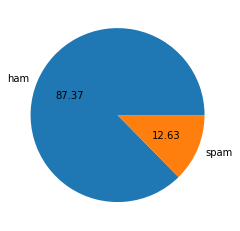

In [19]:
# let us represent it using some charts
import matplotlib.pyplot as plt
# let us show a pie chart
plt.pie(df['target'].value_counts(), labels=['ham', 'spam'], autopct='%0.2f') # autopct is percentage
plt.show()
# so, 87.37% is ham and 12.63% is Spam

In [20]:
# Data is imbalanced, how ? 
# Usually in classification problems we encounter imbalanced dataset.
# imbalanced data is one where one class has large number of observation 
# and other one has fewer observation
# here ham has large(87%) observation and Spam has small(13%) observation


In [21]:
# To perform extensive EDA, let us add 3 more columns into our dataset
# 1. to count no.of characters in sms
# 2. to count no.of words in sms
# 3. to count no.of sentences in sms
# for this we need to install a library -> nltk
# NLTK is a standard python library with prebuilt functions for the ease of 
# use and implementation. It is one of the most used libraries for natural language 
# processing and computational linguistics.

In [22]:
!pip install nltk

You should consider upgrading via the 'c:\python3.7\python.exe -m pip install --upgrade pip' command.


In [23]:
# also need to download some dependencies of nltk -> punkt
# punkt is an Sentence tokensizer, it tokenizes the text into sentences using some 
# un-supervised machine learning algo.
# we can refer this link to understand more
# -> https://www.kite.com/python/docs/nltk.punkt

In [24]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to C:\Users\Amandeep
[nltk_data]     Singh\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [25]:
# let us add an extra column of number of character in each sms
# apply len function to all the sms 
df['num_of_characters'] = df['text'].apply(len)
df.head(5)

,target,text,num_of_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [26]:
# let us fetch no.of words in each sms
df['num_of_words'] = df['text'].apply(lambda sms: len(nltk.word_tokenize(sms)))
df.head(5)
# now last column shows no.of words in each sms

,target,text,num_of_characters,num_of_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [27]:
# let us now fetch number of sentences in sms
# almost same code
# instead of using word_tokenize we have to use sent_tokenize
df['num_of_sentences'] = df['text'].apply(lambda sms: len(nltk.sent_tokenize(sms)))
df.head()

,target,text,num_of_characters,num_of_words,num_of_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [28]:
# So we have successfully created 3 features, hurray!!!...

In [29]:
# let us analyse the 3 features which we have added
df[['num_of_characters', 'num_of_words', 'num_of_sentences']].describe()

,num_of_characters,num_of_words,num_of_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455407,1.961308
std,58.236293,13.322448,1.432583
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [30]:
# let us analyse ham separately
df[df['target'] == 0][['num_of_characters', 'num_of_words', 'num_of_sentences']].describe()

,num_of_characters,num_of_words,num_of_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123339,1.815545
std,56.358207,13.491315,1.364098
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [31]:
# let us analyse spam separately
df[df['target'] == 1][['num_of_characters', 'num_of_words', 'num_of_sentences']].describe()

,num_of_characters,num_of_words,num_of_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.969372
std,30.137753,7.008418,1.488910
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [32]:
# so it is clearly understood that spam messages are having more number of characters and more 
# number of words

In [33]:
!pip install seaborn

You should consider upgrading via the 'c:\python3.7\python.exe -m pip install --upgrade pip' command.


In [34]:
# Seaborn is a data visualization library built on top of matplotlib and closely integrated with 
# pandas data structures in Python. 
# Visualization is the central part of Seaborn which helps in exploration and understanding of data.


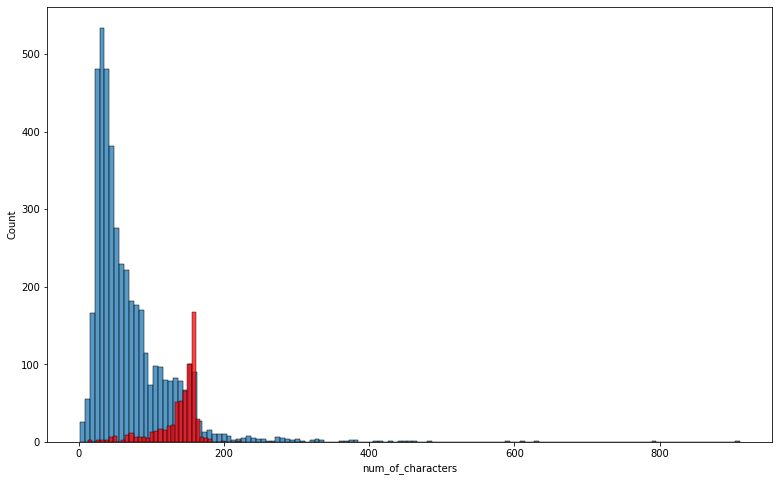

In [35]:
# let us plot histograms of both ham and spam
# for num_of_character
import seaborn as sns
plt.figure(figsize=(13, 8))
sns.histplot(df[df['target'] == 0]['num_of_characters'])
sns.histplot(df[df['target'] == 1]['num_of_characters'], color='red')

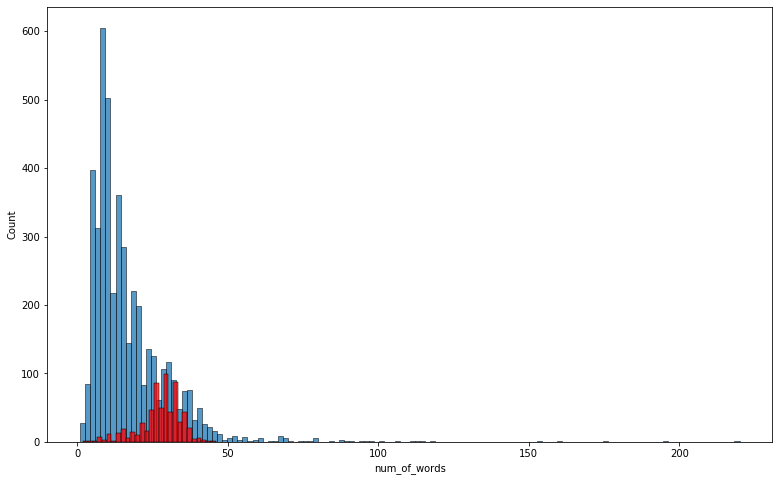

In [36]:
plt.figure(figsize=(13, 8))
sns.histplot(df[df['target'] == 0]['num_of_words'])
sns.histplot(df[df['target'] == 1]['num_of_words'], color='red')

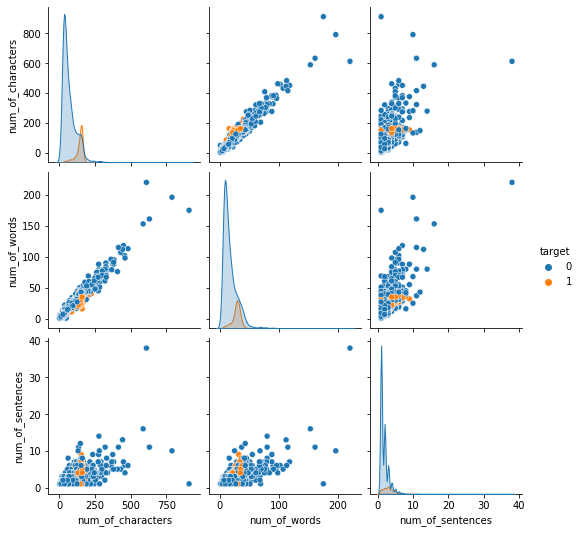

In [37]:
# let us see relation between the last 3 colums
sns.pairplot(df, hue='target')
# hue tells that give different color to target values for better insights

In [38]:
# from above we can see that we have out-liers in our dataset
# out-liers are those points which are not closely present with other points.

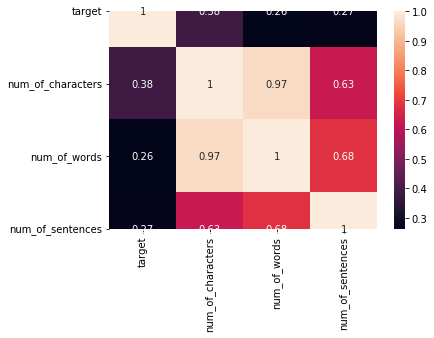

In [39]:
# let us have a look at corelation coefficient
sns.heatmap(df.corr(), annot=True)

## 3. Data Pre-processing
1. Lower Case
2. Tokenization -> breaking down the text.
3. Removing special character.
4. Remove stop words(hmm, ohh, aaa) and punctution.
5. Stemming (converting words like dance, dancing, danced) to dance coz all means the same.

In [40]:
from nltk.corpus import stopwords
import string
# importing module for stemming
from nltk.stem.porter import PorterStemmer
# let me create a function which will do all the 5 steps above for us
def transform_text(text):
    # 1. Lower case
    text = text.lower()
    # 2. Tokenization
    text = nltk.word_tokenize(text)
    
    # Taking only those words which have only alphabets or numbers
    y = []
    for word in text:
        if word.isalnum():
            y.append(word)
    # text = y, aise clone nhi hota :)
    text = y[:]
    # now text is a list of alpha numeric
    y.clear()
    # now y is empty
    # now let us append only those words which are not stopwords(I, and, will, basically those
    # words which have nothing to do with action) and not punctuation
    for word in text:
        if word not in stopwords.words('english') and word not in string.punctuation:
            y.append(word)
    
    text = y[:]
    y.clear()
    # Stemming
    porterStemmer = PorterStemmer()
    for word in text:
        y.append(porterStemmer.stem(word))
    return " ".join(y)

In [41]:
transform_text('Hi how are you aman singh dancing')

'hi aman singh danc'

In [42]:
# let us apply text_transformation on text column and make one extra column
df['transformed_text'] = df['text'].apply(transform_text)
df.head(5)

,target,text,num_of_characters,num_of_words,num_of_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [43]:
# Now using WordCloud library we will see what words make a msg spam or ham
# WordCloud will take important words from sms and show then in large font
# and further we will be using 2 columns majorily that ie.. target and transformed_text
!pip install wordcloud

You should consider upgrading via the 'c:\python3.7\python.exe -m pip install --upgrade pip' command.


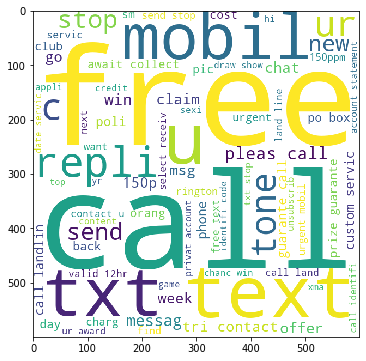

In [44]:
# this cell is for counting spam words in sms
plt.figure(figsize=(12, 6))
from wordcloud import WordCloud
wc = WordCloud(width=600, height=600, min_font_size=13, background_color='white')
# spam_wordcloud 
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=" "))
plt.imshow(spam_wc)
# so we have got those words which are actually used in spam sms

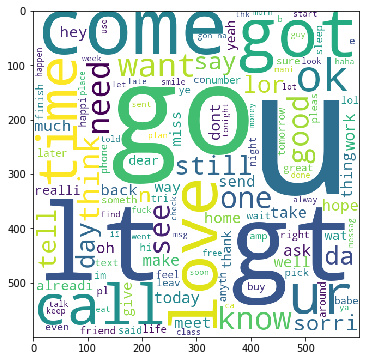

In [45]:
# this cell is for counting ham words in sms
plt.figure(figsize=(12, 6))
from wordcloud import WordCloud
wc = WordCloud(width=600, height=600, min_font_size=13, background_color='white')
# spam_wordcloud 
ham_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep=" "))
plt.imshow(ham_wc)
# so we have got those words which are actually used in ham(normal) sms

In [46]:
# let us now get TOP 30 words used in spam sms
df.head(5)

,target,text,num_of_characters,num_of_words,num_of_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [47]:
for sms in df[df['target']==1]['transformed_text'].tolist():
    print(sms, "\n")

free entri 2 wkli comp win fa cup final tkt 21st may text fa 87121 receiv entri question std txt rate c appli 08452810075over18 

freemsg hey darl 3 week word back like fun still tb ok xxx std chg send rcv 

winner valu network custom select receivea prize reward claim call claim code kl341 valid 12 hour 

mobil 11 month u r entitl updat latest colour mobil camera free call mobil updat co free 08002986030 

six chanc win cash 100 pound txt csh11 send cost 6day tsandc appli repli hl 4 info 

urgent 1 week free membership prize jackpot txt word claim 81010 c lccltd pobox 4403ldnw1a7rw18 

xxxmobilemovieclub use credit click wap link next txt messag click http 

england v macedonia dont miss news txt ur nation team 87077 eg england 87077 tri wale scotland poboxox36504w45wq 

thank subscript rington uk mobil charg pleas confirm repli ye repli charg 

07732584351 rodger burn msg tri call repli sm free nokia mobil free camcord pleas call 08000930705 deliveri tomorrow 

sm ac sptv new jersey 

In [48]:
spam_corpus = []
for sms in df[df['target']==1]['transformed_text'].tolist():
    for word in sms.split():
        spam_corpus.append(word)
len(spam_corpus)
# ohhh, we have total of 9939 words in all spam sms

9939

In [49]:
# collections library is very much useful here
from collections import Counter
Counter(spam_corpus).most_common(30)
# Counter will give us an dictionary with frequency of each word
# and we are only interested in most common 30 words.

[('call', 320),
 ('free', 191),
 ('2', 155),
 ('txt', 141),
 ('text', 122),
 ('u', 119),
 ('ur', 119),
 ('mobil', 114),
 ('stop', 104),
 ('repli', 103),
 ('claim', 98),
 ('4', 97),
 ('prize', 82),
 ('get', 74),
 ('new', 64),
 ('servic', 64),
 ('tone', 63),
 ('send', 60),
 ('urgent', 57),
 ('nokia', 57),
 ('contact', 56),
 ('award', 55),
 ('phone', 52),
 ('cash', 51),
 ('pleas', 51),
 ('week', 49),
 ('win', 48),
 ('c', 45),
 ('collect', 45),
 ('min', 45)]

c:\python3.7\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


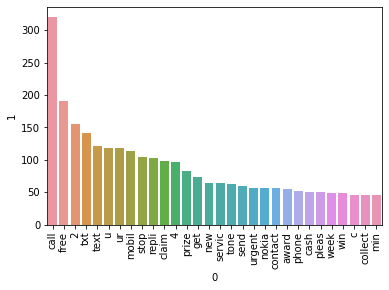

In [50]:
sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[0],pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()
# so we have got bar chart showing top 30 words with their frequency

In [51]:
# let us do the same for ham sms also
ham_corpus = []
for sms in df[df['target'] == 0]['transformed_text'].tolist():
    for word in sms.split():
        ham_corpus.append(word)
len(ham_corpus)
# ohhh, we have total of 9939 words in all ham sms

35402

In [52]:
from collections import Counter
Counter(ham_corpus).most_common(30)

[('u', 883),
 ('go', 404),
 ('get', 349),
 ('gt', 288),
 ('lt', 287),
 ('2', 284),
 ('come', 275),
 ('got', 236),
 ('know', 236),
 ('like', 234),
 ('call', 233),
 ('time', 219),
 ('love', 216),
 ('ok', 215),
 ('good', 213),
 ('want', 208),
 ('ur', 197),
 ('day', 190),
 ('need', 170),
 ('one', 165),
 ('lor', 159),
 ('4', 156),
 ('home', 152),
 ('think', 149),
 ('see', 147),
 ('take', 143),
 ('still', 143),
 ('da', 142),
 ('tell', 133),
 ('make', 129)]

c:\python3.7\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


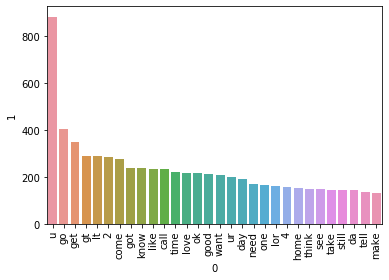

In [53]:
sns.barplot(pd.DataFrame(Counter(ham_corpus).most_common(30))[0],pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()
# so we have got bar chart showing top 30 words with their frequency

## 4. Model Building

In [54]:
# Since Naive Bayes works very well with textual data, we will be using the same.
# But model accepts only numeric data :( 
# so we will use some techniques to make words to numeric data
# like Bag of Words, vectorization word-to-vector
# first we will see bag-of-words


In [55]:
!pip install scikit-learn

You should consider upgrading via the 'c:\python3.7\python.exe -m pip install --upgrade pip' command.


In [66]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [67]:
X = tfidf.fit_transform(df['transformed_text']).toarray()
print(X)
X.shape
# 5169 sms and 6708 words

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


(5169, 3000)

In [68]:
y = df['target'].values

In [59]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [69]:
from sklearn.model_selection import train_test_split

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 2)

In [71]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [72]:
gnb.fit(X_train, y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test, y_pred1))
print(confusion_matrix(y_test, y_pred1))
print(precision_score(y_test, y_pred1))

0.8713733075435203
[[789 107]
 [ 26 112]]
0.5114155251141552


In [73]:
mnb.fit(X_train, y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test, y_pred2))
print(confusion_matrix(y_test, y_pred2))
print(precision_score(y_test, y_pred2))

0.9729206963249516
[[896   0]
 [ 28 110]]
1.0


In [74]:
bnb.fit(X_train, y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test, y_pred3))
print(confusion_matrix(y_test, y_pred3))
print(precision_score(y_test, y_pred3))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


In [ ]:
# tfidf -> mnb

In [75]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))